<a href="https://colab.research.google.com/github/MNour857/Ai-Assignment/blob/master/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name:** Muhammad Noor
## **Job Status:** Data Science Intern
## **Organization:** The Spark Foundation

### **Task 1**: Predict the percentage of an student based on the no. of study hours.


Step 1:
Importing Relevent Libraries

Getting Required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: Importing Data Set

Reading CSV file

In [46]:
from google.colab import files
uploaded = files.upload()

In [47]:
df= pd.read_csv('Data (1).csv')
df.head(10)
#Printing 10 rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Step 3: Visualizing Dataset

Using Scatter Plot

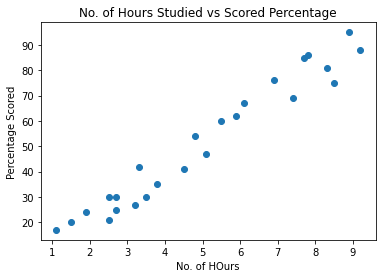

In [62]:
plt.plot(df['Hours'],df['Scores'],'o')
plt.xlabel('No. of HOurs')
plt.ylabel('Percentage Scored')
plt.title('No. of Hours Studied vs Scored Percentage')
plt.show()

Checking the Corelation between variables

In [49]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Step 04: Splitting Dataset

Splitting DataSet into Dependent and Independent Variable

In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

Splitting into training and testing data
### **Ratio: 80-20**



In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

### **Using Linear Regression for Prediction**

Step 05: Training the Model

In [52]:
from sklearn.linear_model import  LinearRegression
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)
print("Model is trained")

Model is trained




1.   Checking Coefficent and intercept
2.   Checking Training and Testing Score



In [54]:
lr.coef_

array([[9.91065648]])

In [55]:
lr.intercept_

array([2.01816004])

In [56]:
lr.score(x_train,y_train)

0.9515510725211553

In [57]:
lr.score(x_test,y_test)

0.9454906892105354

Step 6 : Visualising coefficients and intercepts
Plotting the bestfit line

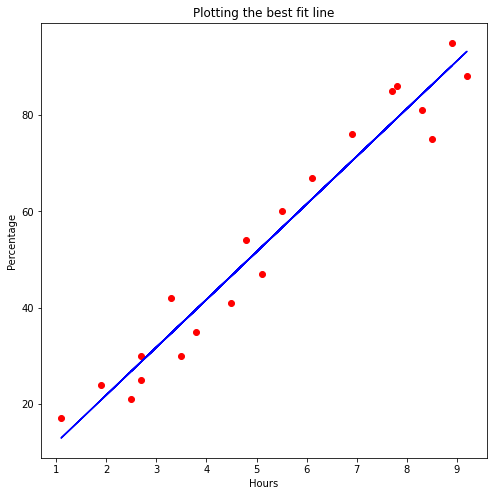

In [58]:
plt.subplots(figsize=(8, 8))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title("Plotting the best fit line")
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

Step 7: Actual vs Predicted Values

In [59]:
y_pred = lr.predict(x_test)

In [60]:
y_pred=lr.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted'])
y_test=pd.DataFrame(y_test,columns=['Actual'])
pd.concat([y_test, y_pred], axis=1)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Step 8:Prediction of Given Values

In [64]:
hours = [[9.25]] #Converting into 2D array
print('Percentage : ' + str(lr.predict(hours)[0]))

Percentage : [93.69173249]


Step 09: Evaluating the Model
Checking Error

In [63]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
